In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("owid-covid-data_3.csv")

In [3]:
df.shape

(83656, 59)

In [95]:
df.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [96]:
X = df.drop('human_development_index', axis=1) 

In [97]:
X= X[['total_cases', 'total_deaths']]

In [98]:
X.fillna(0, inplace=True)

In [99]:
X.head(2)

,total_cases,total_deaths
0,1.0,0.0
1,1.0,0.0


In [93]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [34]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [35]:
labels= kmeans.labels_

In [37]:
kmeans.cluster_centers_[0]

array([183048.13545108,   5781.07616584])

In [38]:
X['cluster'] = labels

In [39]:
X.groupby('cluster').median()

,total_cases,total_deaths
cluster,,
0,8201.5,133.0
1,72959984.0,1626271.0
2,28162561.0,582571.0
3,10573091.0,258295.0
4,116915987.0,2595018.0


In [40]:
X= X.drop('cluster', axis=1)

In [41]:
from  sklearn.metrics import silhouette_score

In [71]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

Automatically created module for IPython interactive environment


<ipython-input-72-24e6a2a4c08e>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor='k')
<ipython-input-72-24e6a2a4c08e>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor='k')
<ipython-input-72-24e6a2a4c08e>:37: DeprecationWarning: `np.float` is a deprecated alias for

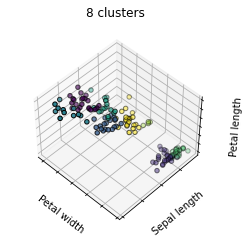

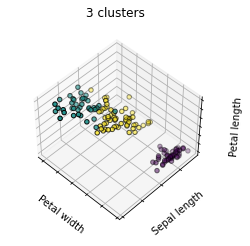

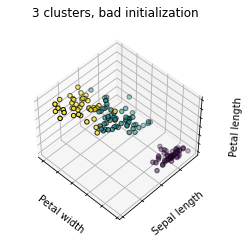

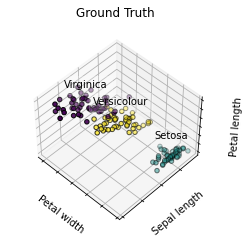

In [72]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


In [75]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import confusion_matrix

In [100]:
X.head(2)

,total_cases,total_deaths
0,1.0,0.0
1,1.0,0.0


<AxesSubplot:>

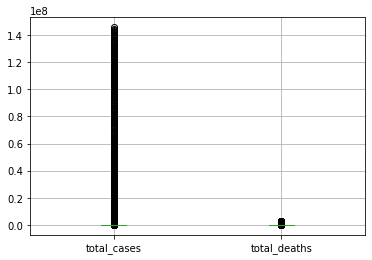

In [102]:
X.boxplot()

In [76]:
lg = LinearRegression()
lg.fit(X,y) #training 
lg.score(X,y) 

0.283903687463841

In [62]:
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.885844,0.897890,0.986256,0.847049,0.872493,0.135614,0.065626,0.077732,0.160545,...,0.019107,-0.034203,-0.035325,0.020432,-0.000471,-0.009232,0.030440,-0.007058,0.021597,0.037330
new_cases,0.885844,1.000000,0.988736,0.897130,0.924627,0.919863,0.101777,0.106146,0.110082,0.125602,...,0.021024,-0.038386,-0.039825,0.021493,0.002227,-0.008811,0.034386,-0.005033,0.025734,0.043025
new_cases_smoothed,0.897890,0.988736,1.000000,0.909314,0.918718,0.938035,0.104936,0.095771,0.112947,0.129881,...,0.021798,-0.039185,-0.040569,0.021723,0.002771,-0.008770,0.034741,-0.004800,0.026361,0.044044
total_deaths,0.986256,0.897130,0.909314,1.000000,0.878282,0.904872,0.121900,0.057675,0.067270,0.176396,...,0.015993,-0.041891,-0.043928,0.026627,-0.002422,-0.009182,0.039850,-0.010620,0.026320,0.041926
new_deaths,0.847049,0.924627,0.918718,0.878282,1.000000,0.972007,0.089405,0.079479,0.085062,0.137568,...,0.014631,-0.046029,-0.044114,0.028652,-0.001047,-0.005757,0.044297,-0.006243,0.027691,0.045343
new_deaths_smoothed,0.872493,0.919863,0.938035,0.904872,0.972007,1.000000,0.101454,0.076734,0.093016,0.143670,...,0.019021,-0.046920,-0.047529,0.021294,0.002550,-0.010976,0.042195,-0.004906,0.029738,0.048182
total_cases_per_million,0.135614,0.101777,0.104936,0.121900,0.089405,0.101454,1.000000,0.585920,0.703137,0.843324,...,0.317908,-0.277311,-0.167808,0.040433,0.328806,0.032523,0.352255,0.155917,0.340694,0.357050
new_cases_per_million,0.065626,0.106146,0.095771,0.057675,0.079479,0.076734,0.585920,1.000000,0.847089,0.492186,...,0.235940,-0.241154,-0.124327,0.018377,0.330505,0.051210,0.293191,0.163138,0.277689,0.308684
new_cases_smoothed_per_million,0.077732,0.110082,0.112947,0.067270,0.085062,0.093016,0.703137,0.847089,1.000000,0.577975,...,0.269209,-0.271390,-0.140834,0.021188,0.375910,0.057837,0.336011,0.185898,0.327409,0.350667
total_deaths_per_million,0.160545,0.125602,0.129881,0.176396,0.137568,0.143670,0.843324,0.492186,0.577975,1.000000,...,0.228495,-0.301918,-0.195474,-0.028216,0.393913,0.004304,0.320133,0.155556,0.357336,0.366478


<AxesSubplot:>

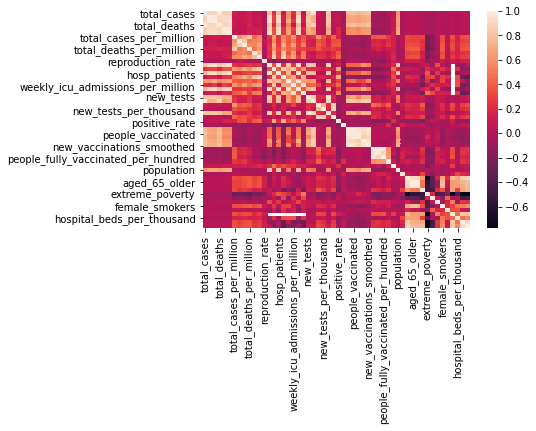

In [58]:
sns.heatmap(df.corr())

In [59]:
df.cov()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,3.057263e+13,1.728474e+11,1.724660e+11,7.686425e+11,3.729117e+09,3.323925e+09,1.406075e+10,6.380762e+07,6.444702e+07,3.633635e+08,...,1.935866e+09,-4.265153e+06,-2.158403e+07,4.150364e+05,-2.847425e+04,-7.276355e+05,6.761709e+06,-9.370549e+04,8.271448e+05,28841.229105
new_cases,1.728474e+11,1.245135e+09,1.211960e+09,4.460569e+09,2.596761e+07,2.236354e+07,6.734688e+07,6.585817e+05,5.824193e+05,1.813565e+06,...,1.331651e+07,-2.988210e+04,-1.521259e+05,2.729644e+03,8.405465e+02,-4.339854e+03,4.759420e+04,-4.176533e+02,6.161919e+03,207.815785
new_cases_smoothed,1.724660e+11,1.211960e+09,1.192242e+09,4.400945e+09,2.512775e+07,2.218157e+07,6.824932e+07,5.842781e+05,5.812444e+05,1.825267e+06,...,1.353580e+07,-2.990842e+04,-1.518690e+05,2.702386e+03,1.025238e+03,-4.233918e+03,4.715771e+04,-3.904372e+02,6.187430e+03,208.538224
total_deaths,7.686425e+11,4.460569e+09,4.400945e+09,1.757853e+10,8.739368e+07,8.683714e+07,3.167852e+08,1.363255e+06,1.373065e+06,9.004835e+06,...,3.945898e+07,-1.243331e+05,-6.371690e+05,1.231456e+04,-3.517838e+03,-1.657165e+04,2.171816e+05,-3.407737e+03,2.471232e+04,785.334543
new_deaths,3.729117e+09,2.596761e+07,2.512775e+07,8.739368e+07,5.620548e+05,5.271437e+05,1.312820e+06,1.061335e+04,9.813558e+03,3.975215e+04,...,1.996622e+05,-7.544602e+02,-3.539341e+03,7.329799e+01,-8.408938e+00,-5.741129e+01,1.324646e+03,-1.107891e+01,1.438169e+02,4.698043
new_deaths_smoothed,3.323925e+09,2.236354e+07,2.218157e+07,8.683714e+07,5.271437e+05,4.690098e+05,1.308729e+06,9.284934e+03,9.493882e+03,4.003363e+04,...,2.328388e+05,-7.054188e+02,-3.507445e+03,5.222166e+01,1.858824e+01,-1.044144e+02,1.132572e+03,-7.865109e+00,1.376054e+02,4.497216
total_cases_per_million,1.406075e+10,6.734688e+07,6.824932e+07,3.167852e+08,1.312820e+06,1.308729e+06,3.497588e+08,1.921754e+06,1.963530e+06,6.327641e+06,...,1.121890e+08,-9.627370e+04,-3.642330e+05,3.026777e+03,6.811213e+04,8.762076e+03,1.020518e+05,7.189911e+03,4.824985e+04,987.578744
new_cases_per_million,6.380762e+07,6.585817e+05,5.842781e+05,1.363255e+06,1.061335e+04,9.284934e+03,1.921754e+06,3.075396e+04,2.218859e+04,3.358966e+04,...,7.609455e+05,-7.604125e+02,-2.422885e+03,1.251228e+01,6.098891e+02,1.230624e+02,7.500748e+02,6.889902e+01,3.706994e+02,7.683916
new_cases_smoothed_per_million,6.444702e+07,5.824193e+05,5.812444e+05,1.373065e+06,9.813558e+03,9.493882e+03,1.963530e+06,2.218859e+04,2.209558e+04,3.405720e+04,...,7.614885e+05,-7.587111e+02,-2.412985e+03,1.254724e+01,6.105799e+02,1.224298e+02,7.460815e+02,6.894595e+01,3.706155e+02,7.676647
total_deaths_per_million,3.633635e+08,1.813565e+06,1.825267e+06,9.004835e+06,3.975215e+04,4.003363e+04,6.327641e+06,3.358966e+04,3.405720e+04,1.473914e+05,...,1.732213e+06,-2.367472e+03,-8.472414e+03,-4.093288e+01,1.629954e+03,2.177057e+01,2.382312e+03,1.529289e+02,1.054119e+03,20.673685


<AxesSubplot:>

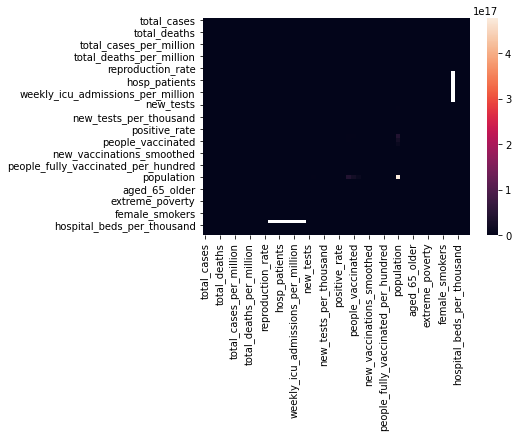

In [66]:
sns.heatmap(df.cov())

In [52]:
y=df.human_development_index 

In [53]:
X.columns

Index(['total_cases', 'total_deaths'], dtype='object')

<AxesSubplot:>

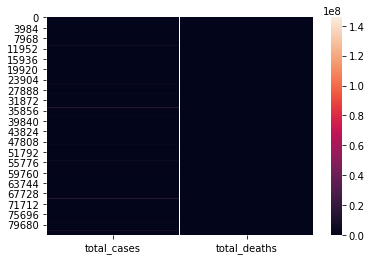

In [67]:
sns.heatmap(X)